In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
%load_ext autoreload

In [3]:
%autoreload
import plotData 
import costFunction
import gradientDescent

In [4]:
# Getting data from ex1data1.txt
data = np.genfromtxt('ex1data1.txt',delimiter = ',')
np.shape(data)

(97, 2)

In [5]:
X = data[:,0]
X.shape = (-1,1)
y = data[:,1]
y.shape = (-1,1)
m = len(y)
X.shape,y.shape

((97, 1), (97, 1))

In [6]:
# Adding a columns of 1's in X
X = np.hstack((np.ones((m,1)),X))
X.shape


(97, 2)

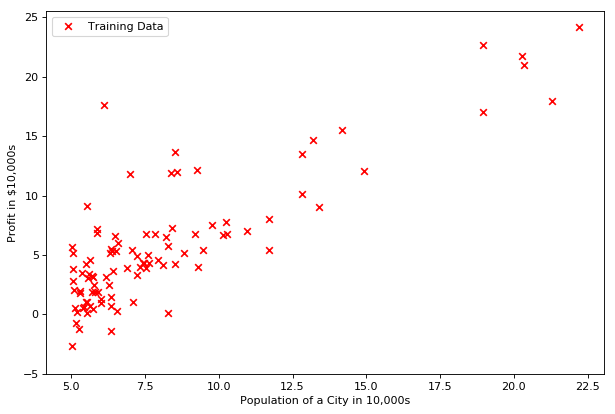

In [7]:
plotData.plotScatter(X[:,1],y)
plt.legend(loc = 'upper left')
plt.show()


In [8]:
# Intializing our parameter vector theta to zeros
theta = np.zeros((2,1))
theta

array([[0.],
       [0.]])

In [9]:
# Finding the cost with theta intialized to zeros
J = costFunction.cost(X,y,theta)
J

32.072733877455676

In [10]:
# Some gradient descent settings
iterations = 1000
alpha = 0.02


In [11]:
# Getting the optimum parameters using gradient descent
final_theta,cost_hist = gradientDescent.gdescent(X,y,theta
                                        ,alpha,iterations)
final_theta

array([[-3.78841926],
       [ 1.18224801]])

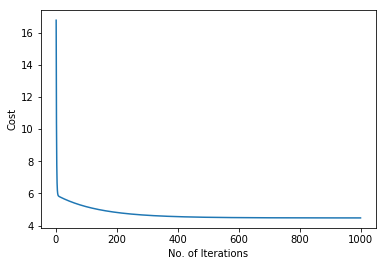

In [12]:
# Checking whether gradient descent has converged
plt.plot(np.arange(1,iterations+1),cost_hist)
plt.xlabel('No. of Iterations')
plt.ylabel('Cost')
plt.show()

In [13]:
# Cost at optimum theta
J_final = costFunction.cost(X,y,final_theta)
J_final

4.478020743321126

In [14]:
# Prediction value at X_max and X_min 
val1 =X[X[:,1].argmin()].dot(final_theta)
val2 = X[X[:,1].argmax()].dot(final_theta)

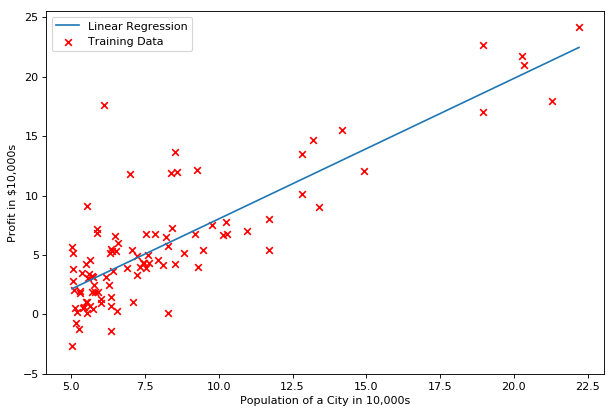

In [15]:
# Plotting the linear regression curve on the scatter plot
plotData.plotScatter(X[:,1],y)
plt.plot([np.min(X[:,1]),np.max(X[:,1])],[val1,val2],label = "Linear Regression")
plt.legend(loc = 'upper left')
plt.show()

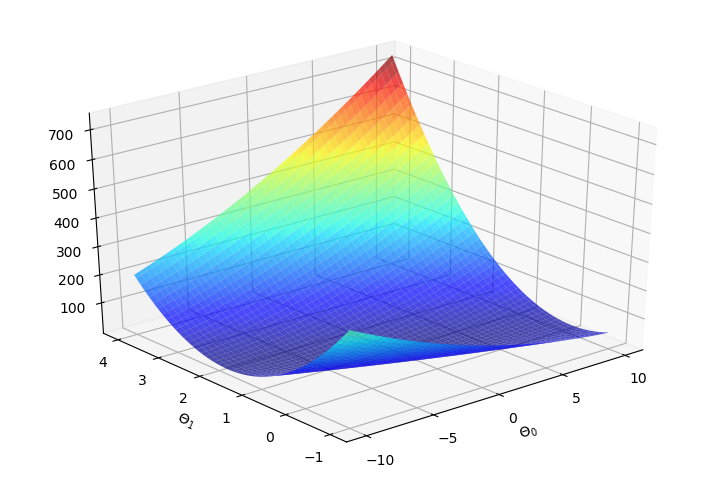

In [18]:
# Surface plot of the Cost Function 
theta0_vals = np.linspace(-10,10,100)
theta1_vals = np.linspace(-1,4,100)
xx, yy = np.meshgrid(theta0_vals,theta1_vals)
J_vals = np.zeros((theta0_vals.size,theta1_vals.size))

for (i,j),v in np.ndenumerate(J_vals):
    t = np.array([[xx[i,j]],[yy[i,j]]])
    J_vals[i,j] = costFunction.cost(X,y,t)

fig = plt.figure(figsize=(9,6),dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx,yy,J_vals,alpha =0.7,cmap=cm.jet)
ax.view_init(azim=230)
ax.xaxis.set_ticks(np.arange(theta0_vals.min(),theta0_vals.max()+1,5))

plt.xlabel('$\Theta_0$')
plt.ylabel('$\Theta_1$')
plt.show()

In [17]:
# Prediction of profits in areas with 35,000 and 70,000 people
predict1 = np.array([1,3.5]).dot(final_theta)
predict2 = np.array([1,7]).dot(final_theta)
print "Profit prediction in an area with 35,000 people: \n$", predict1*10000
print "Profit prediction in an area with 70,000 people: \n$", predict2*10000

Profit prediction in an area with 35,000 people: 
$ [3494.48756838]
Profit prediction in an area with 70,000 people: 
$ [44873.16775227]
